In [ ]:
!pip install diffusers==0.3.0
!pip install transformers scipy ftfy

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from torch import autocast

pipe = StableDiffusionPipeline.from_pretrained("tmar5/sd-digimon-142", torch_dtype=torch.float16)  
pipe = pipe.to("cuda")

In [81]:
from PIL import Image

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

  0%|          | 0/51 [00:00<?, ?it/s]

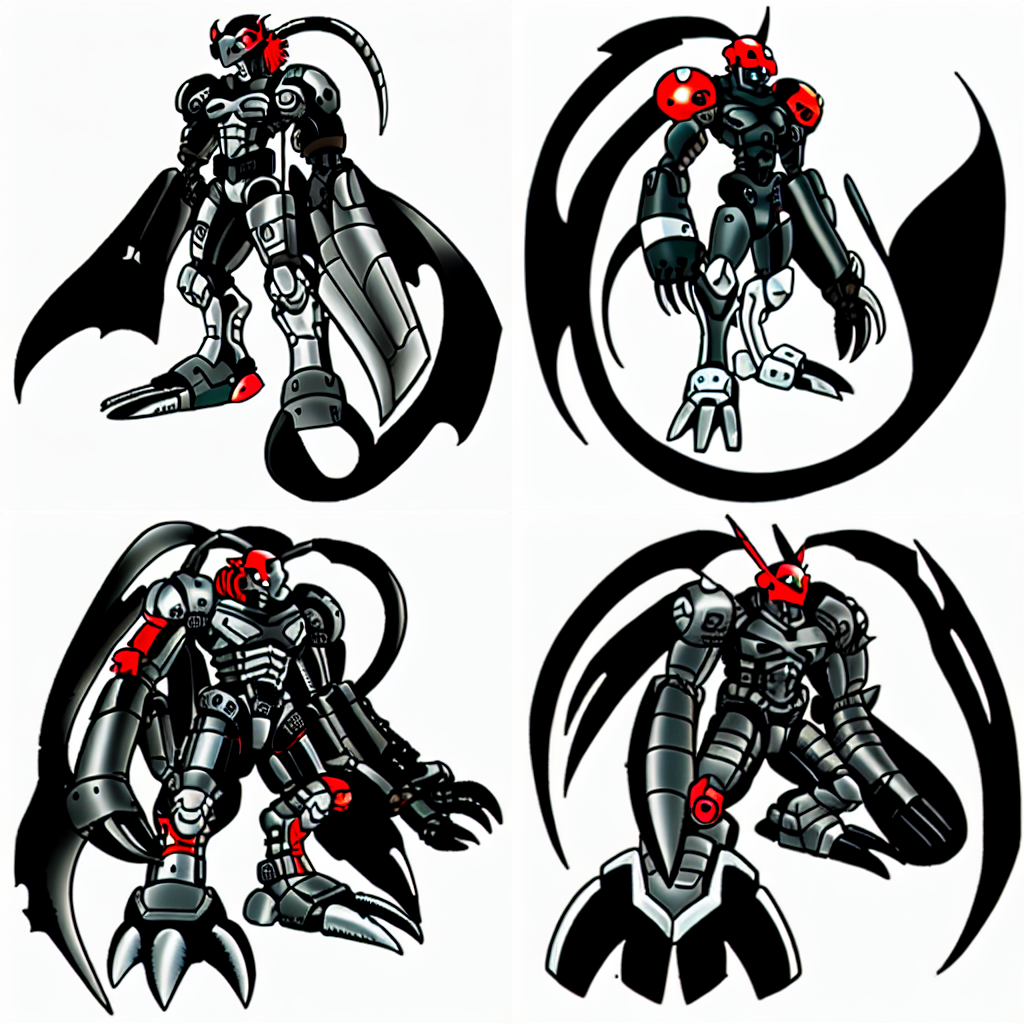

In [91]:
prompt = "a robocop digimon, high quality, 4k"
neg_prompt="deformed, poor art, bad quality"
scale = 7
n_samples = 4

# Sometimes the nsfw checker is confused by the Digimon images, you can disable
# it at your own risk here
disable_safety = True

if disable_safety:
  def null_safety(images, **kwargs):
      return images, False
  pipe.safety_checker = null_safety

with autocast("cuda"):
  images = pipe(n_samples*[prompt], negative_prompt=n_samples*[neg_prompt] ,num_inference_steps=50, guidance_scale=scale).images

grid = image_grid(images, rows=2, cols=2)
grid

  0%|          | 0/51 [00:00<?, ?it/s]

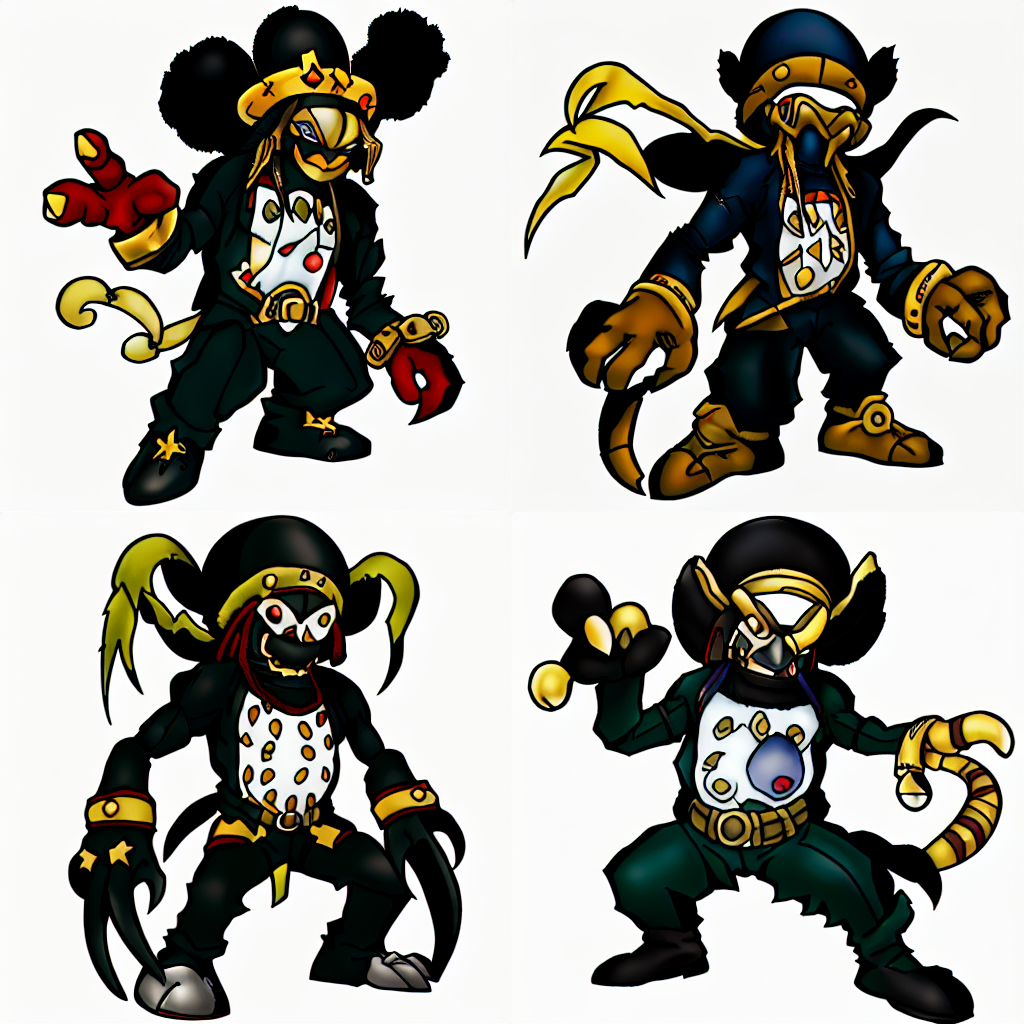

In [85]:
prompt = "bob marley, high quality, 4k"
neg_prompt="deformed, poor art, bad quality"
scale = 7
n_samples = 4

# Sometimes the nsfw checker is confused by the Digimon images, you can disable
# it at your own risk here
disable_safety = True

if disable_safety:
  def null_safety(images, **kwargs):
      return images, False
  pipe.safety_checker = null_safety

with autocast("cuda"):
  images = pipe(n_samples*[prompt], negative_prompt=n_samples*[neg_prompt] ,num_inference_steps=50, guidance_scale=scale).images

grid = image_grid(images, rows=2, cols=2)
grid